# LeNet



In [1]:
import torch
from torch import nn

from torch_book.data.simple_vision import load_data_cifar10, load_data_fashion_mnist
from torch_book.tools import train, try_gpu


net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, padding=2), 
                    nn.Sigmoid(),
                    nn.AvgPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
                    nn.AvgPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
                    nn.Linear(120, 84), nn.Sigmoid(),
                    nn.Linear(84, 10))

loss 0.045, train acc 0.988, test acc 0.903
68082.4 examples/sec on cuda:0


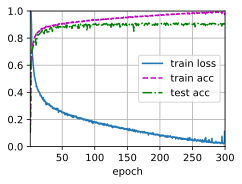

In [2]:
batch_size = 256
lr, num_epochs = 0.9, 300

train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)
train(net, train_iter, test_iter, num_epochs, lr, try_gpu())